# Image Recognition

Image recognition systems have improved and are now used for everything from searching photo libraries to generating text-based descriptions of photographs. 

In this course, we will: 
1. Learn how to build a deep neural network that can recognize objects in photographs
2. Find out how to adjust state-of-the-art deep neural networks to recognize new objects, without the need to retrain the network
3. Explore cloud-based image recognition APIs that you can use as an alternative to building your own systems
4. Learn the steps involved to start building and deploying your own image recognition system

### Learning Objectives:

- Classifying images
- Designing an image recognition system
- Building a deep neural network
- Training a deep neural network
- Modifying pre-trained neural networks
- Using image recognition APIs
- Deploying a deep neural network


-------------------------------------

## How Image Classification Works
Image recognition is the ability for computers to look at a photograph and understand what's in the photograph. Here we're passing in a picture to the neural network, and the neural network is generating a label, dog, because that's the main object that appears in the picture. 

Using neural networks, it's now possible to recognize objects and photographs with high accuracy. Let's take a quick look at the inner workings and structure of a neural network. 

In [15]:
# Image
from PIL import Image, ImageDraw
import PIL
import face_recognition # access to the face detection model in DLIB

# System
import os
import sys

# Deep learning
# import tensorflow as tf
# import tensorflow.keras
import keras

print('These are the current versions working for me as of 2019-07-13')
# print(f"TensorFlow Version: {tf.__version__}")
# print(f"TensorFlow Keras Version: {tensorflow.keras.__version__}")
print(f"Keras Version: {keras.__version__}")
# print()
print(f"Python {sys.version}")
# print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

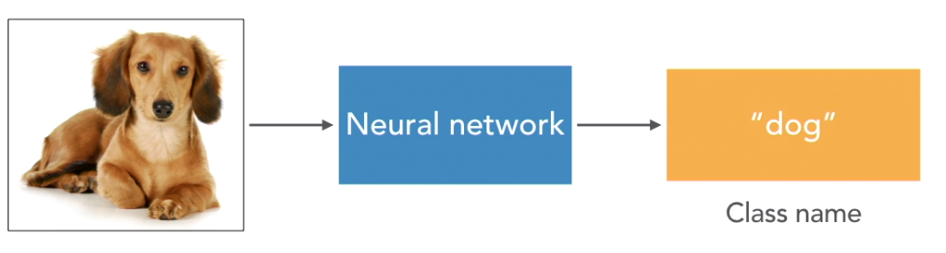

In [16]:
Image.open('Images/01-image.png')

-------------------------------------

## What is a neural network?
A __neural network__ is made up of separate __nodes__ called neurons. These neurons are arranged into a series of groups called __layers__. Nodes in each layer are connected to the nodes in the following layer. 

Data flows from the input to the output along these connections. Each individual node is trained to perform a simple mathematical calculation and then feed its result to all the nodes it's connected to. 

1. The neural network takes in a set of input values in the input layer
2. Then those values pass through all the following layers. Each node tweaks the value it receives slightly and passes its result onto the next node

For example, we could use this neural network (see below) to do addition. To use it to do addition, we pass in two values we want to add, here two and two, into the input nodes. And it will give us the result in the output layer. And it gives us four. But neural networks aren't limited to doing simple operations like addition. 

### Complexity
When many layers are connected together and data flows through the entire network, neural networks are able to model complex operations. 

In this course, we'll learn how neural networks with many layers can recognize objects and images. 

In the picture below, we have 2 nodes in the input layer, 3 nodes in both layer 1 and 2, and an output node.  Also know this, that each node is connected to every node in the following layer. These are called __densely connected layers__. Densely connected layers are the most basic kind of layer in the neural network. 

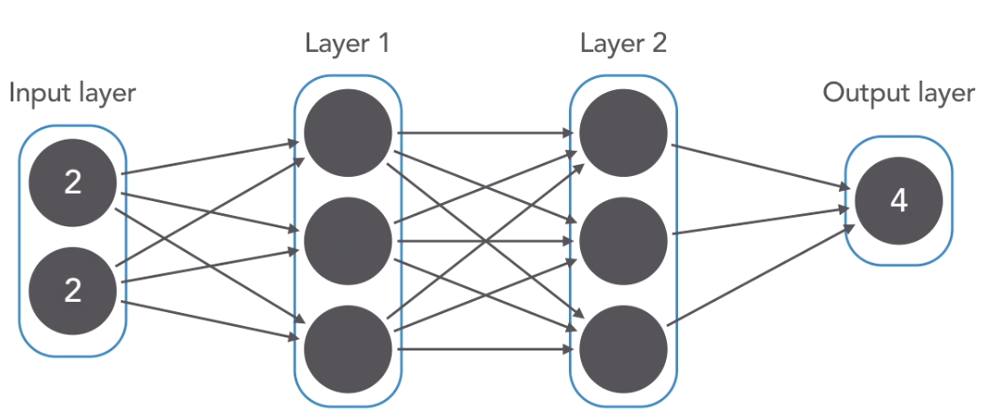

In [17]:
Image.open('Images/02-nn.png')

## Keras

Keras is a software framework used to code neural networks. Keras is a high-level library for building neural networks in Python with a few lines of code.

### Create a new sequential neural network model with Keras

Seequential models are defined in each layer in order sequentially, or one layer at a time. Next, we'll add a layer with three nodes. Specify the network to have two input nodes by passing in the input_dim parameter. This will specify the number of nodes in the input layer.

Next, we add the second layer with three nodes and then we fianlly add the final layer with one node to act as the output layer.

In [18]:
model = keras.models.Sequential()
model.add(Dense(3, input_dim=2))
model.add(Dense(3))
model.add(Dense(1))

### Keras also lets us customize how each layer works (activation function)

One of the most important things to configure are __activation functions__. Before values flow from the nodes in one layer to the next, they pass through an activation function.

Activation functions decide which inputs from the previous layer are important enough to feed to the next layer. Keras lets us choose which activation function is used for each layer by passing in the name of the activation function that we want to use.

Here below, when we call model.add, we are going to use a __rectified linear unit__ or a __relu__ activation function. Keras supports all the standard functions in use today. There's also less commonly needed things that we can customize for each layer beyond the activation function.

### One Guiding Principle
One of the guiding principles of Keras is that it'll do the best thing that it can if we don't specify extra parameters. In ohter words, the default settings are modeled after what are considered best practices. So most of the time, just choosing the number of nodes in a layer and choosing an activation is good enough.

In [20]:
# Add in an activation function in the input layer and layer 1
model = keras.models.Sequential()                   # input layer
model.add(Dense(3, input_dim=2, activation='relu')) # layer 1
model.add(Dense(3, activation='relu'))              # layer 2
model.add(Dense(1))                                 # output layer

### Final step in defining a neural network is to compile it

This tells Keras that we're done defining the model and that we actually wanna build it out of memory. When you compile a model, you have to pass in the optimizer algorithm and the loss function that you want to use. 

- The optimizer algorithm is used to train the neural network

- The loss function is how the training process measures how right or how wrong your neural networks predictions are

This is a complete neural network that we can train to solve very simple classification problems. 

In [21]:
# Compile the model
model = keras.models.Sequential()                   # input layer
model.add(Dense(3, input_dim=2, activation='relu')) # layer 1
model.add(Dense(3, activation='relu'))              # layer 2
model.add(Dense(1))                                 # output layer
model.compile(optimizer='adam', loss='mse')         # compile the model (train)

-------------------------------------

## Images into a Neural Network

Let's take a look the how images are stored on the computer. This is a typical image (dog picture). Let's zoom in on the area around the dog's paw so that we can see the individual pixels that make up the image. 

### What is an image (3D Array w/ color)?
Here we can see that the image is actually a series of individual color pixels. But each color pixel is actually made up of a mix of three colors. Red, green, and blue. In the image file, the three different color channels are stored separately. There's actually three separate images in the image file. 

### 3 Files - Red, Green, Blue
One that represents the red intensity, one that represents the green intensity, and one that represents the blue intensity of each pixel. The color image that you see on the screen, is just a mix of those three colors. Each pixel is just a number from 0 to 255 that represents how intense the color should be at that point. Here we can see that the bright points are close to 255 and the dark points are close to zero. 

### Color Channel
That means that each color channel is really just a two dimensional ray of integers with one number for each pixel in the image. Inside of the image file, there are three separate arrays like this, one for each color. 

If we layer the three color channels on top of each other, we can think of an image as a three dimensional array as always three layers deep. 

### Feeding the Image into a NN
So, to be able to feed this image into a neural network, we need a neural network that has one input node for every number in this 3-D array. These numbers add up very quickly. Let's pretend that we want recognize what appears in a 256x256 pixel image. In modern terms, that's a pretty tiny image. Any cell phone takes pictures that are many, many times higher resolution. But even with the small image, we need 256 x 256 x 3 input nodes in our neural network. That comes out to over 196 thousand input nodes. And that's just for the input layer. Each layer of the neural network will use even more nodes.

### Working with Image Data (Large Size -> Smaller Size)
The number of nodes in the entire neural network will quickly grow into the millions. 
- That's why using neural networks for image processing is so computational intensive
- Processing an image requires sending it through a neural network of millions of nodes 

Because of this, image recognition systems tend to work with images that are very small. It's very common to build image recognition systems that work with images that are between 128 and 512 pixels wide. Larger than that, it gets too slow and requires too much memory. When working with larger images, we usually just scale them down to those smaller sizes before feeding them into the neural network.
- Images are scaled down to that smaller size before being fed into a neural network

-------------------------------------

## Recognizing Image Contents with a Neural Network

Before we can use the neural network to make classifications we need to train it. 

Let's pretend that we're training a simple neural network that can recognize the handwritten number eight. 
1. To do this we need to collect the dataset of training images. We need lots of images that belong to the class that we wanna recognize. In this case we'll collect 1000 images of the letter eight written by lots of different people.
2. We also need lots of images that represent the other possible kinds of images that we'll see. That way the neural network can learn to tell the two different types or classes of images apart. 
3. So we'll also collect 1000 images of other numbers as part of our training dataset. 

-------------------------------

### 1. Gathering Training Data
Now that we have training data we can train the neural network by showing it images and telling it what the correct answer will be for each one. So we'll start by showing it some eights and telling it the answer should be one to represent true. We'll give it lots of different examples of what eights could look like. We'll also show it other numbers and tell it that the answer should be zero to represent false. 

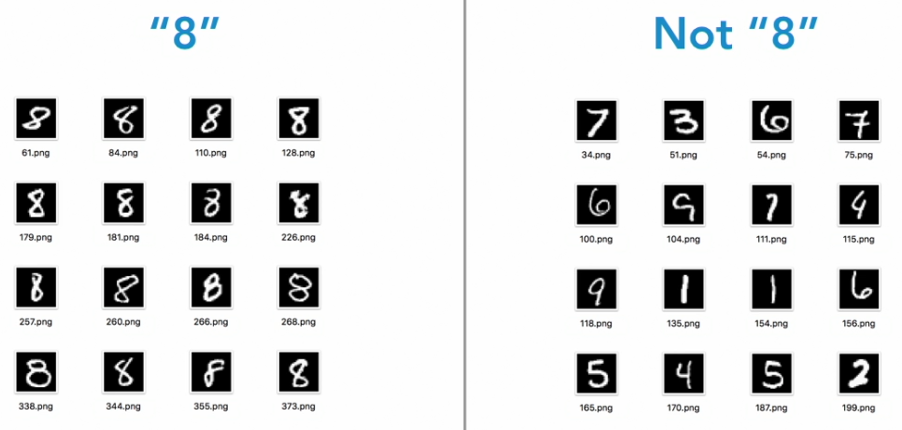

In [22]:
Image.open('Images/03-number_eight.png')

-------------------------------

### 2. Training the Neural Network with Images
After repeating this process over and over with lots of images the __neural network will eventually learn weights for each node__ that make it possible to separate the images of the number eight from the images of other numbers. 

### 3. Pass in new images to classify
Now that the neural network is trained we can pass in a new image and it will tell us its best guess for the correct answer. This is called a prediction. But instead of telling us exactly zero or one it'll give us a floating point number in that range depending on how well it can determine the correct class. So if we pass in an eight it might give us a value close to one like 0.98. And if we pass in another number it might give us a number close to zero like 0.04.

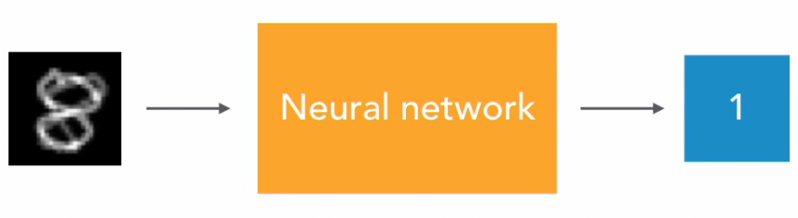

In [23]:
Image.open('Images/04-training-eight.png')

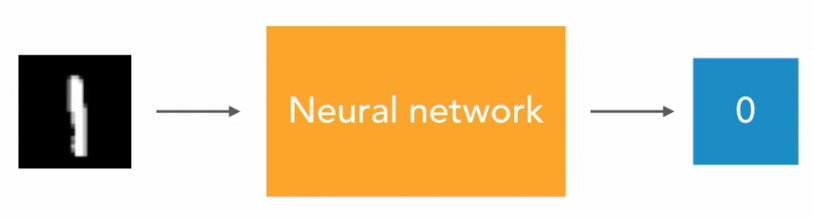

In [24]:
Image.open('Images/05-training-one.png')

### Building a single neural network that has more than one output

But being able to only detect one kind of digit isn't that useful and we could train a separate neural network to recognize each different digit but that's a lot of work. Instead we can build a single neural network that has more than one output. 

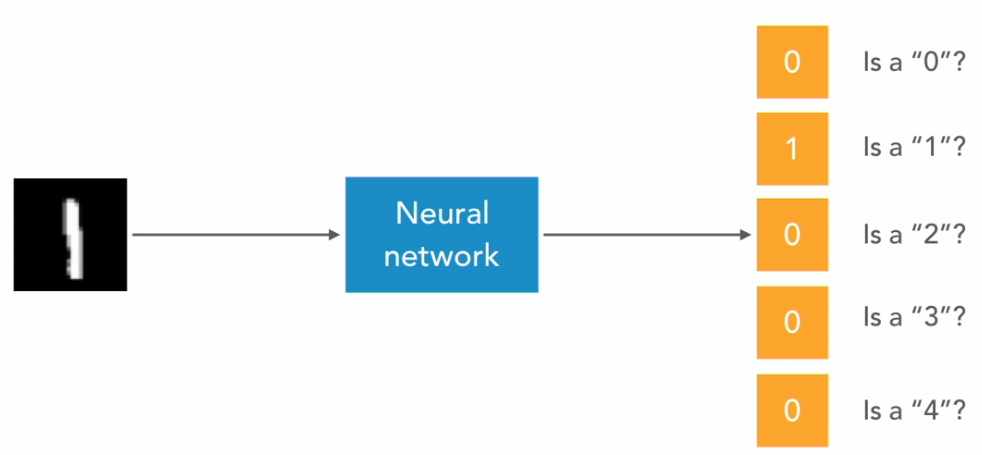

In [25]:
Image.open('Images/06-multi-class.png')

If we give the neural network one output for each possible digit that we want to detect it'll give us a probability score for each one. This works the same way as before except that we train it by telling it to predict the one for the correct answer and a zero for all the other answers. 

### Modern Image Recognition Model (Multi-Layered)
In a modern image recognition model we're often building neural networks that can predict thousands of different classes of objects. It's not unusual to have a thousand or more output nodes in the neural network. 

### Neural Network Naturally Learning Patterns
When we train the neural network the different layers of the neural network naturally learn to look for different patterns in the input data. 

#### Top Layer
You can roughly think of the top layers as looking for simple patterns like lines and sharp edges. 

#### Lower Layer
The lower layers use a signal from the higher layers to look for more and more complex shapes and patterns. 

### Combination of the Layers
With all the layers working together the model can identify very complex objects. That means that adding more layers to a neural network tends to give it the capacity to learn more complex patterns and shapes. This is where the term deep learning originally came from. 

### Deep Learning
Deep learning is just the idea that making models deeper by adding more capacity to them lets us recognize more complex patterns and data. 

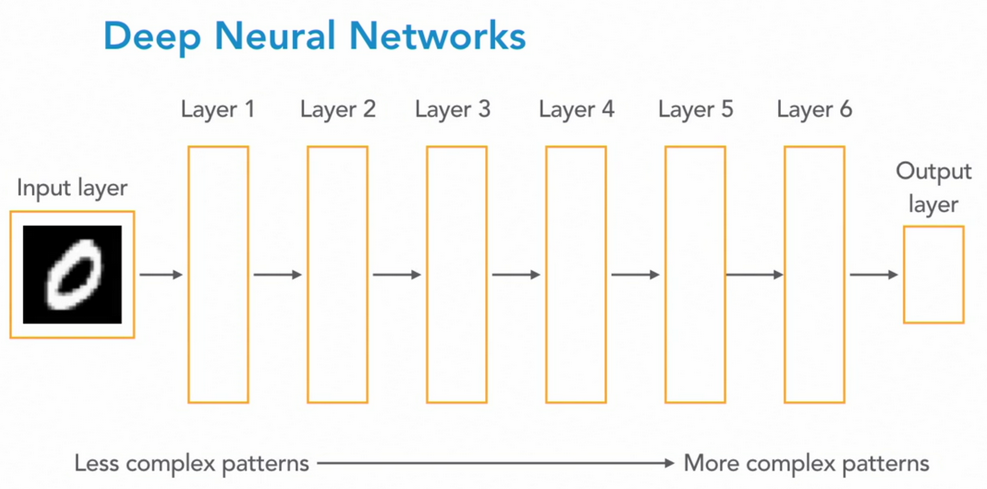

In [26]:
Image.open('Images/07-deep-nn.png')

------------------------------

## Adding Convolution for Translational Invariance

### Problem with Training
If we only train the neural network with pictures of numbers that are perfectly centered, the neural network will get confused if it sees anything else. For example, if we pass in an image like this, where the eight is not centered, the neural network won't be able to make a good prediction. But the eight could appear anywhere in the image. It could just as easily appear at the bottom like this. 

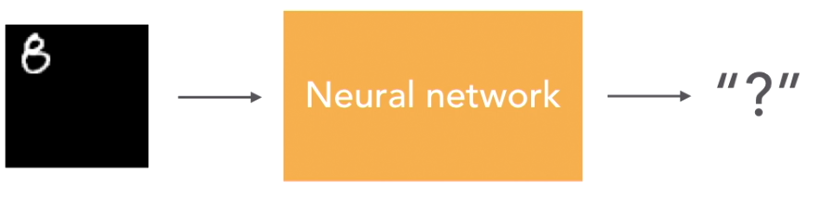

In [27]:
Image.open('Images/08-bad.png')

### Solution
We need to improve our neural network so that it can recognize objects in any position. This is called __translation invariance__. 

### Model Should Be Able To Recognize Object Anywhere
This is the idea that a machine learning model should recognize an object no matter where it is moved within the image. Moving the eight around the image doesn't change the fact that it's still just an eight. 

### Adding a Convolutional Layer
The solution is to add a new type of layer to our neural network called the __convolutional layer__. 

Unlike a normal dense layer, where every node is connected to every other node, this layer breaks apart the image in a special way so that it can recognize the same object in different positions, let's see how it works.

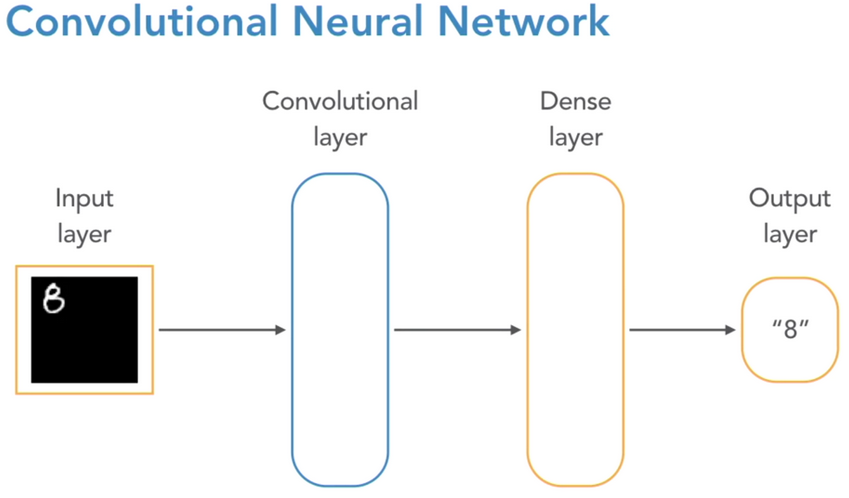

In [28]:
Image.open('Images/09-cnn.png')

### Convolutional Steps
1. The first step is to break the image into small, overlapping tiles. We do this by passing a small window over the image. Each time it lands somewhere, we grab a new image tile. We repeat this until we've covered the entire image. 

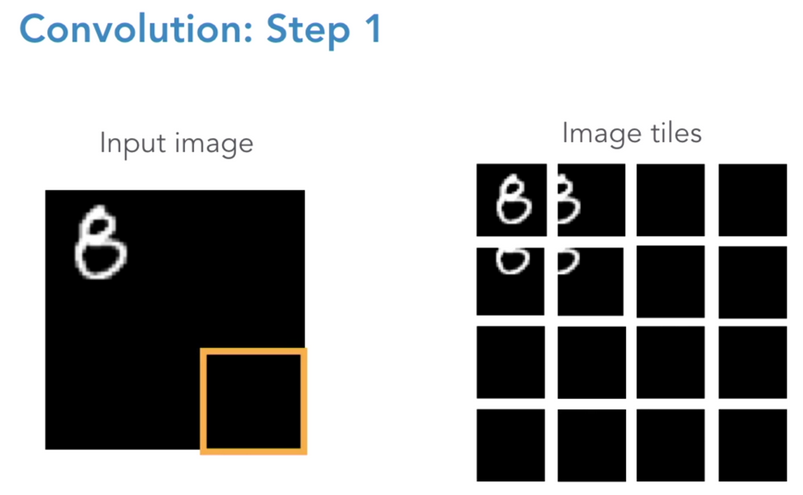

In [29]:
Image.open('Images/10-cnn-step-one.png')

2. Next, we'll pass each image tile through the same neural network layer. Each tile will be processed the same way and we'll save a value each time. 

    - In other words, we're turning the image into an array, where each entry in the array represents whether or not the neural network thinks a certain pattern appears at that part of the image.

### Note: Step 2 & 3 are the bottom but step 2 is getting the first layer and step 3 adds on

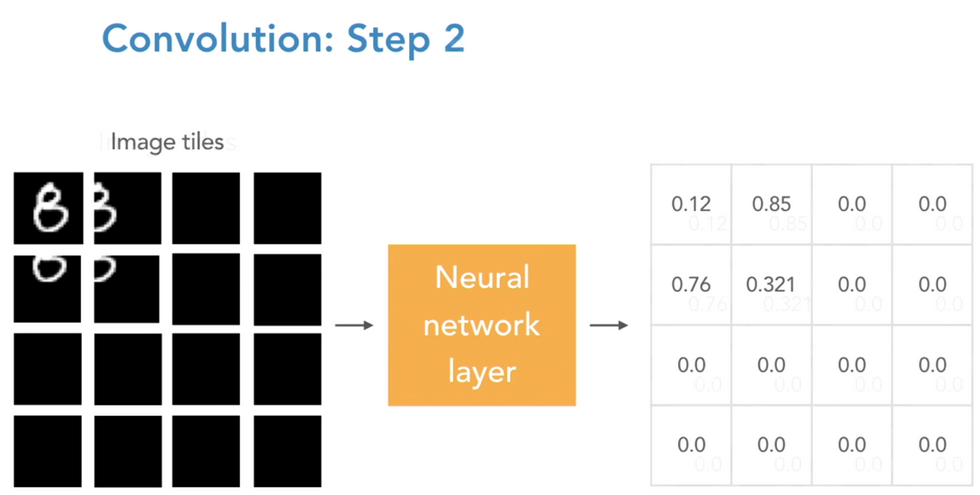

In [32]:
Image.open('Images/11-cnn-step-two.png')

### Repeat Step 2 & Add New Layers with New Weights
3. Next, we'll repeat this exact process again. But this time, we'll use a different set of weights on the nodes in our neural network layer. 

    - This will __create another feature map__ that tells us whether or not a certain pattern appears in the image. But because we're using different weights, they'll be looking for a different pattern than the first time. We can repeat this process several times until we have several layers in our new array. 

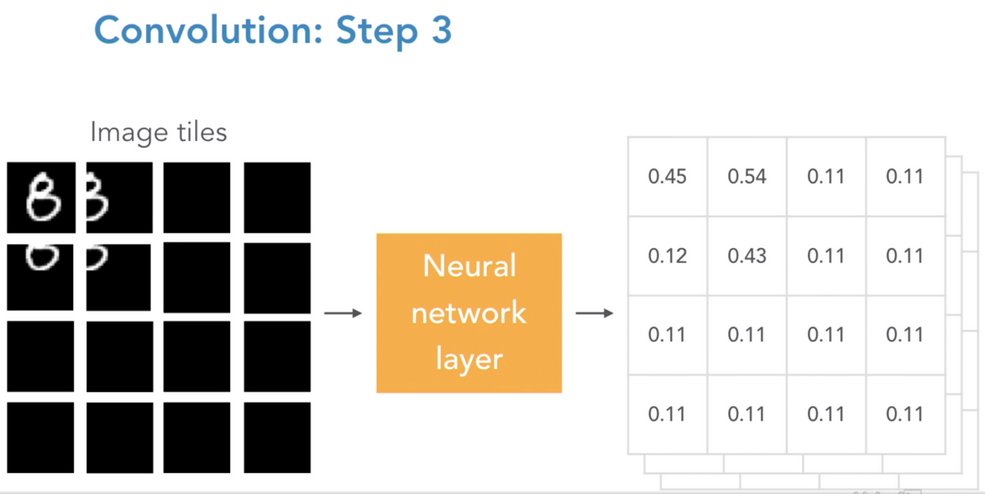

In [31]:
Image.open('Images/10-cnn-step-three.png')

### 3D Array
This turns our original array into a 3D array. 

Each element in the array represents where a certain pattern occurs. But because we are checking each tile of the original image, it doesn't matter where in the image a pattern occurs. We can find it anywhere. 

### Feed the 3D Array into NN
This 3D array is what we'll feed into the next layer of the neural network. It will use this information to decide which patterns are most important in determining the final output. 

## Summary
Adding a convolutional layer makes it possible for our neural network to be able to find the pattern, no matter where it appears in an image. In this example, we have only one convolutional layer. But normally, we'll have several convolutional layers that repeat this process multiple times. 

The rough idea is that we keep squishing down the image with each convolutional layer while still capturing the most important information from it. 

By the time we reach the output layer, the neural network will have been able to identify whether or not the object appeared. 

Convolutional neural networks are a secret weapon for image detection, they make it possible to efficiently detect objects. It's the standard approach for building image recognition systems. 